In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_chunks = []
for chunk in pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv', chunksize=100_000):
    # You can process each chunk here directly to avoid memory buildup
    data_chunks.append(chunk)  # This will use memory, so avoid for full EDA

# Combine all chunks into a single DataFrame
df = pd.concat(data_chunks, ignore_index=True)

/tmp/ipython-input-1586223655.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv', chunksize=100_000):
/tmp/ipython-input-1586223655.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv', chunksize=100_000):
/tmp/ipython-input-1586223655.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv', chunksize=100_000):
/tmp/ipython-input-1586223655.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv', chunksize=100_000):
/tmp/ipython-input-1586223655.py:2: DtypeWarning: Columns (35) have mixe

In [ ]:
#df= pd.read_csv(r'/content/drive/MyDrive/data/GUIDE_Train.csv')
df

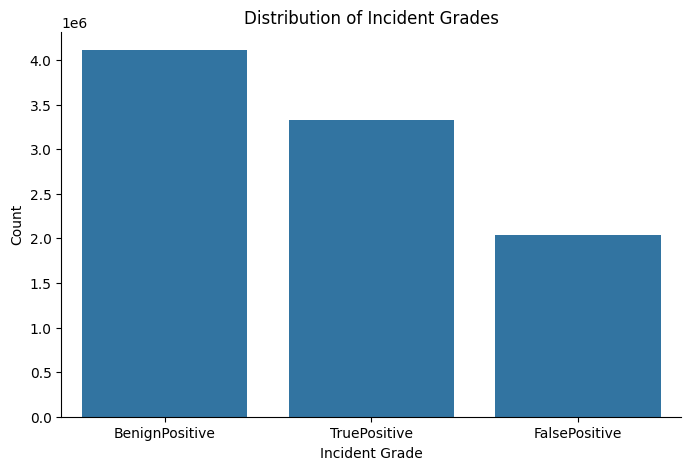

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='IncidentGrade',
    data=df,
    order=df['IncidentGrade'].value_counts().index  # Sort bars by frequency
)
plt.title('Distribution of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')

# Remove top and right spines (optional for cleaner look)
sns.despine()

plt.show()

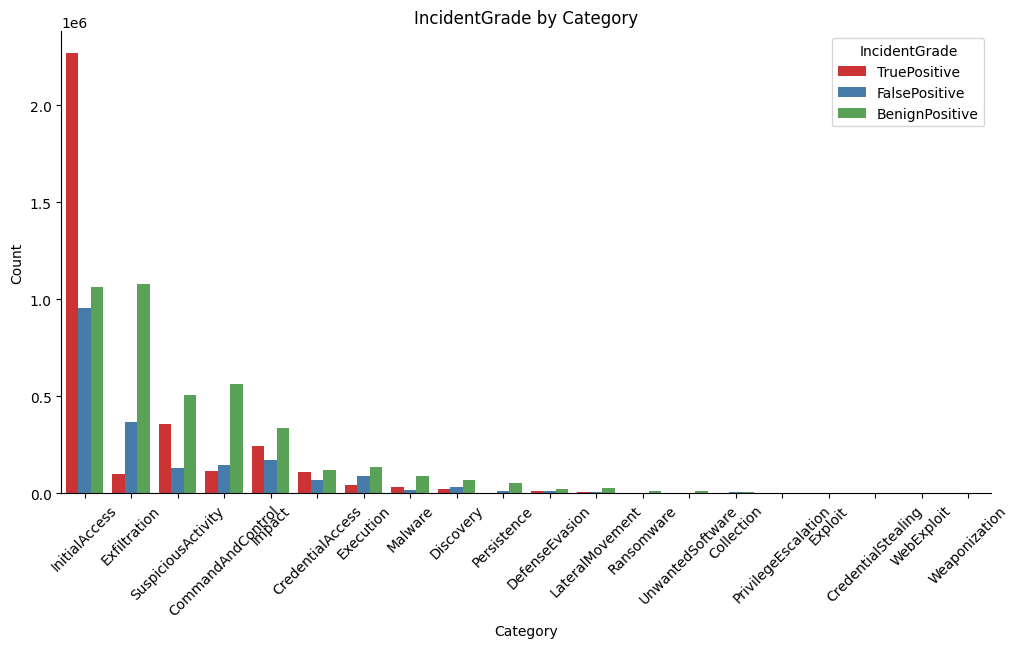

In [6]:
#---- 3️ Category vs IncidentGrade ----
plt.figure(figsize=(12,6))
sns.countplot(
    x='Category',
    hue='IncidentGrade',
    data=df,
    order=df['Category'].value_counts().index,
    palette='Set1'
)
plt.title('IncidentGrade by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
sns.despine()
plt.show()

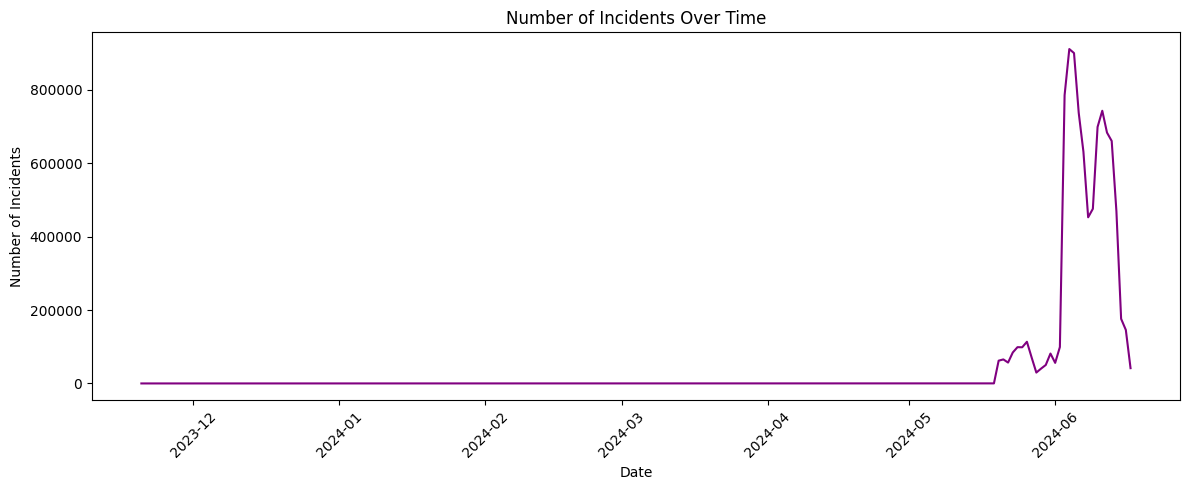

In [7]:
# ----  Number of Incidents Over Time ----
# # Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Create a Date column (just the date part)
df['Date'] = df['Timestamp'].dt.date

# Now plot number of incidents over time
plt.figure(figsize=(12,5))
df.groupby('Date').size().plot(color='purple')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1010403835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_detectors.index, y=top_detectors.values, palette='viridis')


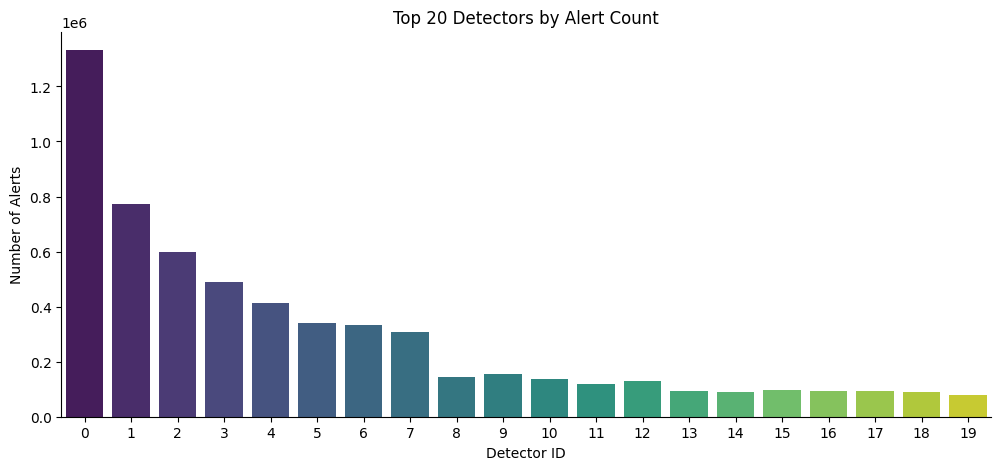

In [8]:
plt.figure(figsize=(12,5))
top_detectors = df['DetectorId'].value_counts().head(20)
sns.barplot(x=top_detectors.index, y=top_detectors.values, palette='viridis')
plt.title('Top 20 Detectors by Alert Count')
plt.xlabel('Detector ID')
plt.ylabel('Number of Alerts')
sns.despine()
plt.show()

/tmp/ipython-input-1762838959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


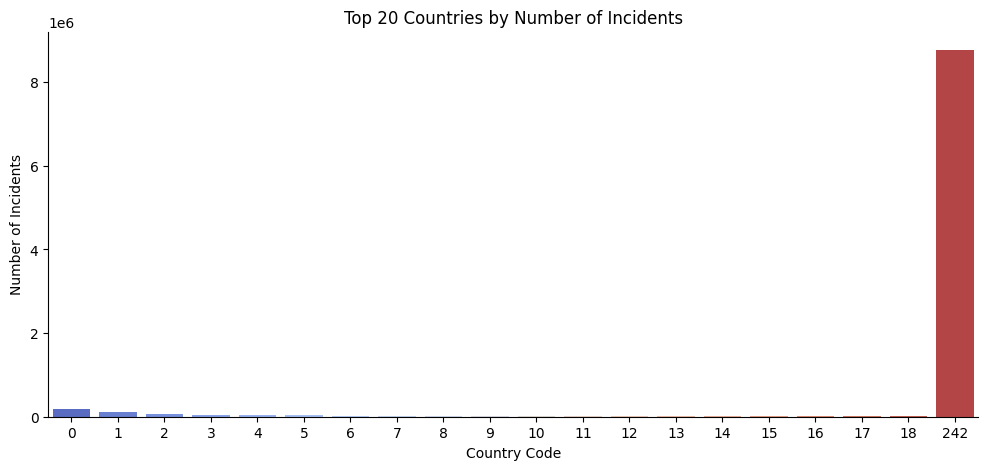

In [9]:
# ----  Top Countries by Incidents ----
plt.figure(figsize=(12,5))
top_countries = df['CountryCode'].value_counts().head(20)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 20 Countries by Number of Incidents')
plt.xlabel('Country Code')
plt.ylabel('Number of Incidents')
sns.despine()
plt.show()

/tmp/ipython-input-4279771252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


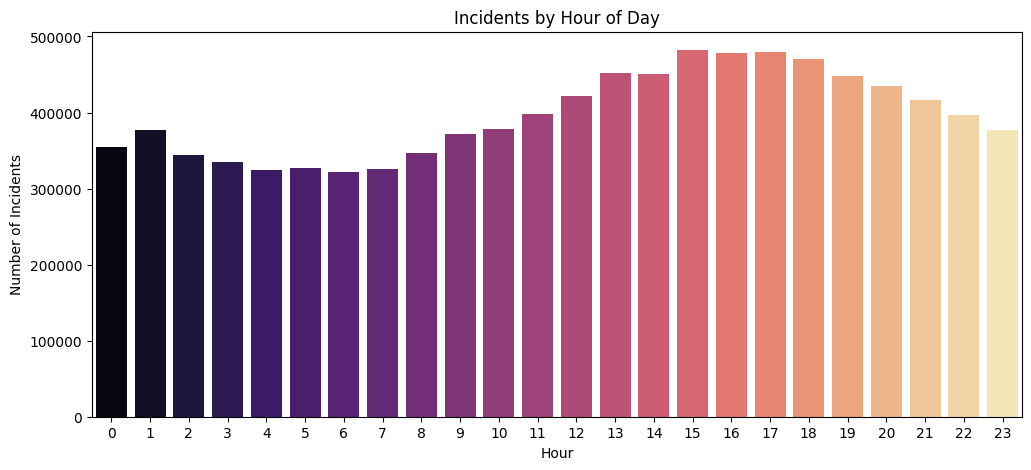

In [10]:
# Detect peak attack times (extract hour from Timestamp).
df['Hour'] = df['Timestamp'].dt.hour
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.show()


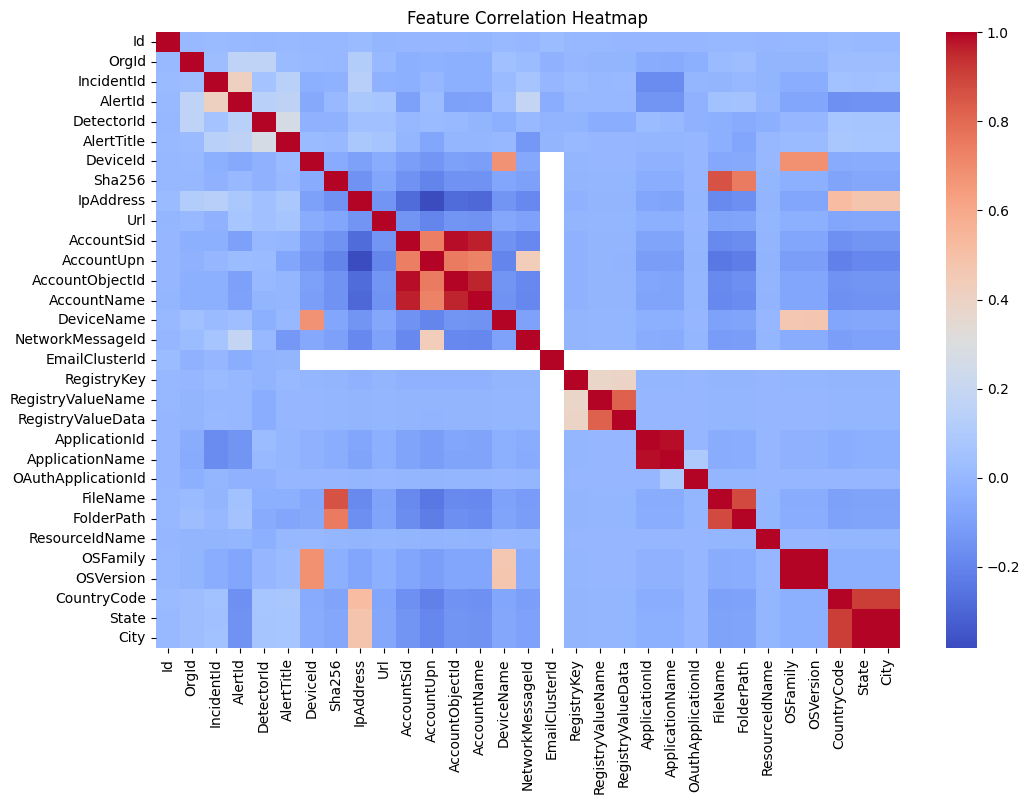

In [4]:
# Correlation Heatmap
# -----------------------------
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Data Visualizatiion after Trimming

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [8]:
def data_check(df):
    missing_percent  = df.isna().sum() / len(df) *100
    missing_percent = missing_percent[missing_percent > 0]
    print(missing_percent)
    to_be_removed = missing_percent[missing_percent > 50].index.tolist()
    df.drop(columns=to_be_removed , axis=1,inplace=True)
    simple_imputer =SimpleImputer(strategy = 'most_frequent')
    low_missing_percent =missing_percent[missing_percent < 50].index.tolist()
    for col in low_missing_percent:
        df[col]  = simple_imputer.fit_transform(df[[col]]).ravel()


In [9]:
data_check(df)

MitreTechniques      57.460120
IncidentGrade         0.539465
ActionGrouped        99.410897
ActionGranular       99.410897
EmailClusterId       98.982729
ThreatFamily         99.213173
ResourceType         99.925658
Roles                97.707736
AntispamDirection    98.136965
SuspicionLevel       84.825536
LastVerdict          76.523030
dtype: float64


In [10]:
df_trimmed , _= train_test_split(df, train_size=15000, stratify=df['IncidentGrade'], random_state=42)

In [11]:
df=df_trimmed
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
5574101,1374389539650,137,73788,67551,2024-06-14T06:36:52.000Z,6,5,InitialAccess,BenignPositive,File,...,3421,881,2150,117668,3586,5,66,242,1445,10630
2903256,970662610688,0,268,333933,2024-06-05T01:36:36.000Z,7,6,InitialAccess,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
5926232,1219770716227,24,132016,343515,2024-06-10T04:32:06.000Z,5,21,SuspiciousActivity,BenignPositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
6696736,1580547966521,1,44,1193720,2024-06-04T06:47:03.000Z,7,6,InitialAccess,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
6296955,1022202221055,9,336,356085,2024-06-06T04:12:48.000Z,95,213,Exfiltration,BenignPositive,Machine,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061429,721554505786,6,198006,773191,2024-06-13T10:38:01.000Z,2,2,CommandAndControl,BenignPositive,Process,...,3421,881,12,12,3586,5,66,242,1445,10630
5471199,51539611553,14,3845,2974,2024-05-31T13:12:06.000Z,29,20,Impact,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4480251,1039382087356,26,129629,1592957,2024-06-10T01:17:19.000Z,632,832,SuspiciousActivity,BenignPositive,File,...,3421,881,5712,9,3586,5,66,242,1445,10630
8707478,1056561955320,156,129883,59630,2024-06-15T16:43:50.000Z,1,1,InitialAccess,BenignPositive,Mailbox,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [14]:
y=df['IncidentGrade']
y

,IncidentGrade
5574101,BenignPositive
2903256,TruePositive
5926232,BenignPositive
6696736,TruePositive
6296955,BenignPositive
...,...
1061429,BenignPositive
5471199,TruePositive
4480251,BenignPositive
8707478,BenignPositive


In [17]:
df.drop(columns=['IncidentGrade'],inplace=True)


In [19]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
5574101,1374389539650,137,73788,67551,2024-06-14T06:36:52.000Z,6,5,InitialAccess,File,Related,...,3421,881,2150,117668,3586,5,66,242,1445,10630
2903256,970662610688,0,268,333933,2024-06-05T01:36:36.000Z,7,6,InitialAccess,User,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
5926232,1219770716227,24,132016,343515,2024-06-10T04:32:06.000Z,5,21,SuspiciousActivity,User,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
6696736,1580547966521,1,44,1193720,2024-06-04T06:47:03.000Z,7,6,InitialAccess,User,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
6296955,1022202221055,9,336,356085,2024-06-06T04:12:48.000Z,95,213,Exfiltration,Machine,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061429,721554505786,6,198006,773191,2024-06-13T10:38:01.000Z,2,2,CommandAndControl,Process,Related,...,3421,881,12,12,3586,5,66,242,1445,10630
5471199,51539611553,14,3845,2974,2024-05-31T13:12:06.000Z,29,20,Impact,Ip,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4480251,1039382087356,26,129629,1592957,2024-06-10T01:17:19.000Z,632,832,SuspiciousActivity,File,Related,...,3421,881,5712,9,3586,5,66,242,1445,10630
8707478,1056561955320,156,129883,59630,2024-06-15T16:43:50.000Z,1,1,InitialAccess,Mailbox,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [23]:
from datetime import datetime
def process_timestamp(date_str):
    timestamp = datetime.strptime(date_str , "%Y-%m-%dT%H:%M:%S.%fZ")
    hour = timestamp.hour
    if hour < 6:
        return "Night"  # Night
    elif hour < 12:
        return 'Morning'  # Morning
    elif hour < 18:
        return 'Afternoon'  # Afternoon
    else:
        return 'Evening' # Evening

In [24]:
df['Timestamp']=df['Timestamp'].apply(process_timestamp)
df['Timestamp']

,Timestamp
5574101,Morning
2903256,Night
5926232,Night
6696736,Morning
6296955,Night
...,...
1061429,Morning
5471199,Afternoon
4480251,Night
8707478,Afternoon


In [27]:
cols=list(df.columns)
cols

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City']

In [28]:
train_data = pd.read_csv(r'/content/drive/MyDrive/data/train_data.csv')
test_data = pd.read_csv(r'/content/drive/MyDrive/data/test_data.csv')
y_train= train_data['IncidentGrade']
y_test=test_data['IncidentGrade']
x_train , x_test = train_data,test_data
x_train.drop(columns=['IncidentGrade'],axis=1,inplace=True)
x_test.drop(columns=['IncidentGrade'],axis=1,inplace=True)

In [29]:
x_train.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
x_test.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [30]:
y_train.value_counts() / len(y_train) * 100

,count
IncidentGrade,
0,43.733333
2,34.913333
1,21.353333


In [31]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.071718,-0.115260,0.025857,-0.738037,0.565566,-0.240569,-0.256713,0.293712,-1.075726,0.909463,...,0.153251,0.015841,-3.190403,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
1,0.258163,-0.469468,-0.582566,-0.158042,1.460974,-0.238271,-0.256626,0.293712,1.362762,-1.099549,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
2,0.760144,-0.407417,0.507730,-0.137179,1.460974,-0.242867,-0.255317,1.865119,1.362762,-1.099549,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
3,1.487151,-0.466882,-0.584420,1.713980,0.565566,-0.238271,-0.256626,0.293712,1.362762,-1.099549,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
4,0.362021,-0.446199,-0.582004,-0.109810,1.460974,-0.036020,-0.238565,-0.491992,-0.146778,-1.099549,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.243819,-0.453955,1.053838,0.798358,0.565566,-0.249762,-0.256975,-2.063399,0.782169,0.909463,...,0.153251,0.015841,-3.216626,-3.340908,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
14996,-1.593975,-0.433271,-0.552964,-0.878642,-1.225249,-0.187708,-0.255404,0.031811,-0.611252,0.909463,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
14997,0.396640,-0.402246,0.487976,2.583242,1.460974,1.198168,-0.184558,1.865119,-1.075726,0.909463,...,0.153251,0.015841,-3.146713,-3.341001,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155
14998,0.431260,-0.066136,0.490078,-0.755284,-1.225249,-0.252060,-0.257062,0.293712,0.201577,-1.099549,...,0.153251,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155


In [34]:
#balancing
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
resampled_x,resampled_y = smote.fit_resample(x_train,y_train)


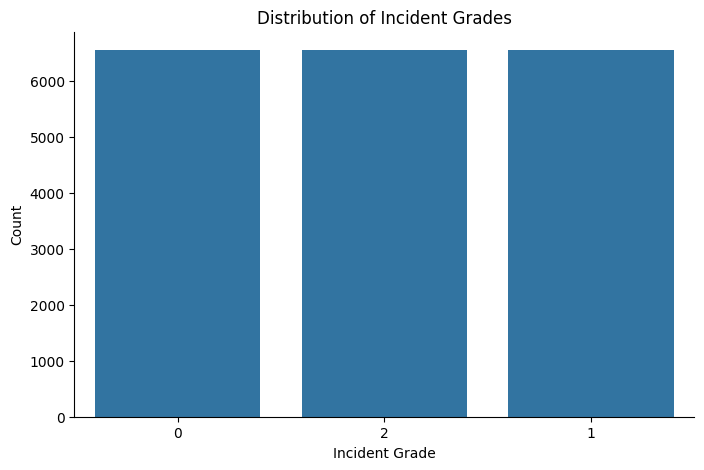

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(
    x=resampled_y,
    data=df,
    order=resampled_y.value_counts().index  # Sort bars by frequency
)
plt.title('Distribution of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')

# Remove top and right spines (optional for cleaner look)
sns.despine()

plt.show()

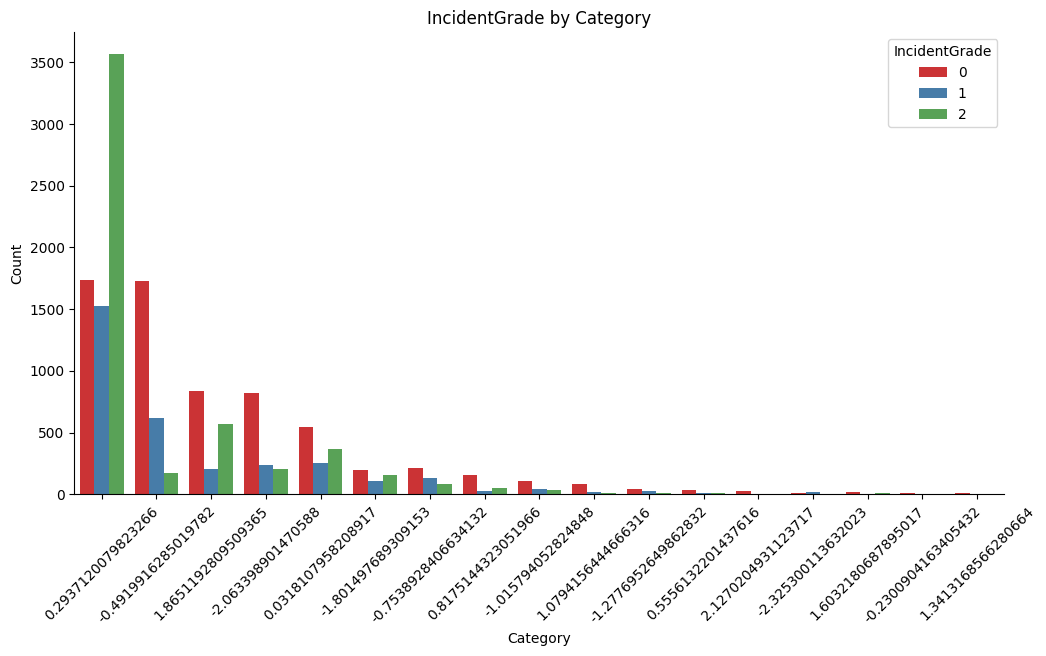

In [38]:
#---- 3️ Category vs IncidentGrade ----
plt.figure(figsize=(12,6))
sns.countplot(
    x=x_train.iloc[:,7],
    hue=y_train,
    data=df,
    order=x_train.iloc[:,7].value_counts().index,
    palette='Set1'
)
plt.title('IncidentGrade by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
sns.despine()
plt.show()

/tmp/ipython-input-355716072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_detectors.index, y=top_detectors.values, palette='viridis')


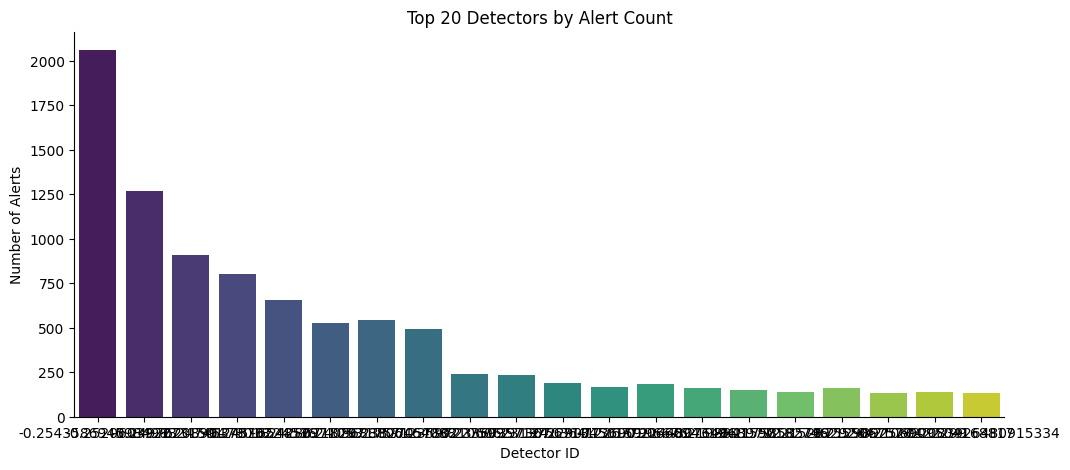

In [43]:



plt.figure(figsize=(12,5))
top_detectors = x_train.iloc[: , 5].value_counts().head(20)
sns.barplot(x=top_detectors.index, y=top_detectors.values, palette='viridis')
plt.title('Top 20 Detectors by Alert Count')
plt.xlabel('Detector ID')
plt.ylabel('Number of Alerts')
sns.despine()
plt.show()

/tmp/ipython-input-3723504668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


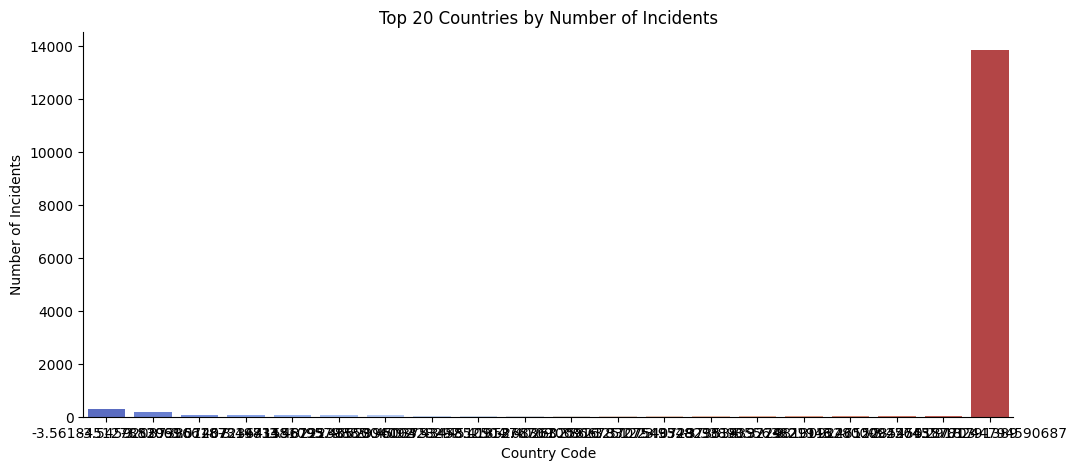

In [44]:
# ----  Top Countries by Incidents ----
pos=cols.index('CountryCode')
plt.figure(figsize=(12,5))
top_countries = x_train.iloc[:,pos].value_counts().head(20)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 20 Countries by Number of Incidents')
plt.xlabel('Country Code')
plt.ylabel('Number of Incidents')
sns.despine()
plt.show()

/tmp/ipython-input-853815259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_train.iloc[:,pos], data=x_train, palette='magma')


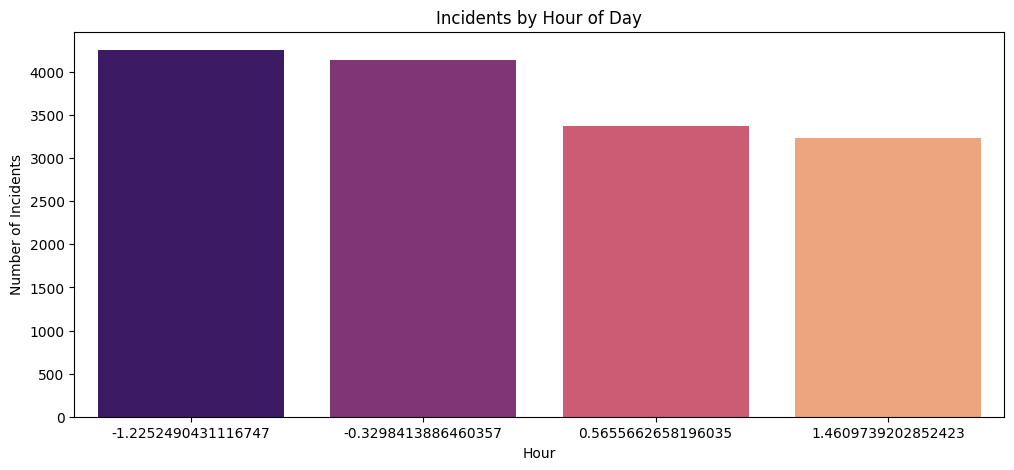

In [46]:
# Detect peak attack times (extract hour from Timestamp).
pos=cols.index('Timestamp')

plt.figure(figsize=(12,5))
sns.countplot(x=x_train.iloc[:,pos], data=x_train, palette='magma')
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.show()

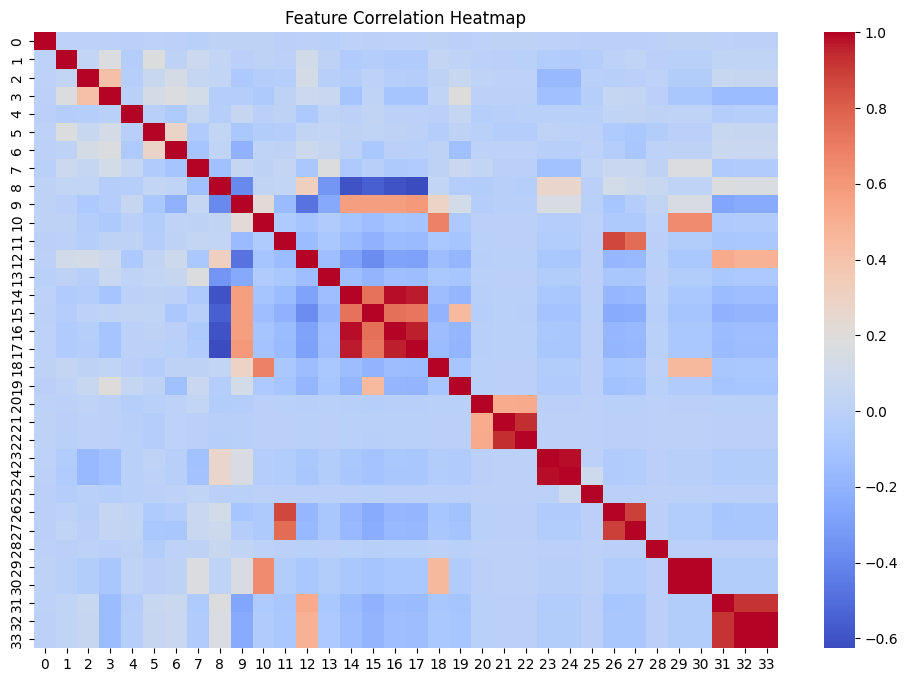

In [47]:
plt.figure(figsize=(12,8))
corr = x_train.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()